# Riemann Problem

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

## Exact Solution

In [3]:
exact = np.loadtxt("Sod_exact.dat")

In [4]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2]
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

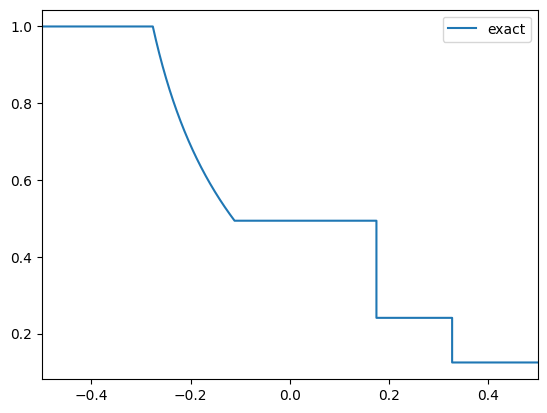

In [5]:
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

## Read the Numerical Results

In [6]:
gf400= SimDir("Sod_1d_400/").gf
gf800= SimDir("Sod_1d_800/").gf
gf200= SimDir("Sod_1d_200/").gf

In [7]:
vars1d_400=gf400.x
vars1d_200=gf200.x
vars1d_800=gf800.x

In [8]:
rho400=vars1d_400.fields.rho
rho200=vars1d_200.fields.rho
rho800=vars1d_800.fields.rho

In [9]:
def plot_rho(rho, label):
    
    small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])
    rho_final = rho.read_on_grid(max(rho.iterations), small_grid)
    plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro "+l, lw=1)
    plt.xlim(-0.45, 0.45)

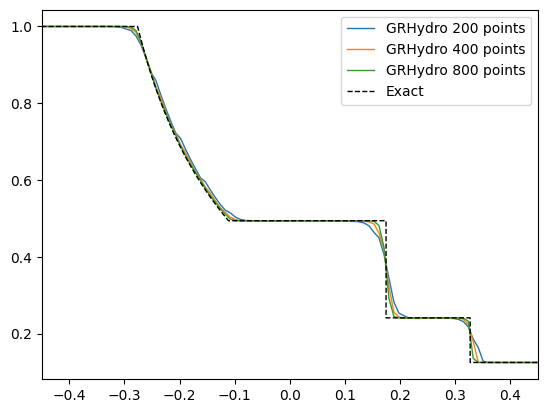

In [10]:
densities = [rho200, rho400, rho800]
labels = ['200 points','400 points', '800 points']

for rho,l in zip(densities,labels):
    plot_rho(rho,l)
plt.plot(x_exact, rho_exact, label='Exact', ls='dashed', c='k', lw=1)
plt.legend();